# Question 3 : Decision Tree (Regression Tree)

In this question, we have to predict the saleprice.
Let us first import all the necessary libraries like numpy, panda, matplotlib , etc. and
sklearn.metrics for calculating F1-Score, Confusion Matrix, r2_score, mean squared error, etc.

### Import Libraries

In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as mpl
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Let us see what our data set contains.

In [33]:
train_data=pd.read_csv('Datasets/q3/train.csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,99.0,12099,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,354000
1,2,20,RL,89.0,13214,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,378500
2,3,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,153500
3,4,160,FV,30.0,3000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,173733
4,5,20,RL,NaN,6897,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,202665
996,997,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
997,998,85,RL,NaN,9101,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,165500
998,999,20,RL,75.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,208900


In [34]:
test_data=pd.read_csv('Datasets/q3/test.csv')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,80.0,9920,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1,1002,20,RL,60.0,7200,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal
2,1003,20,RL,93.0,9382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal
4,1005,60,RL,65.0,15426,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1456,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
456,1457,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
457,1458,20,RL,80.0,8800,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,3,2006,WD,Normal
458,1459,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [9]:
test_label=pd.read_csv('Datasets/q3/test_labels.csv',header=None)
test_label

,0,1
0,1001,128000
1,1002,124900
2,1003,191000
3,1004,144000
4,1005,231500
...,...,...
455,1456,86000
456,1457,64500
457,1458,160000
458,1459,204000


### Preprocessing

Now, First we will preprocess the data. By preprocessing, we mean that

1: If the column contains more than half Nan values, then we will drop that column.

2: Otherwise, For categorical data, we fill nan value by mode of the column
    and For Numerical data, we fill nan value by mean of the column.
    
To find whether the data is categorical or not.
we have is_categorical() function.

In [10]:
def is_categorical(array):
    return array.dtype.name == 'object'

In [35]:
nan_col=['Id']
threshold=int(1000*0.55)
for col in train_data:
    no_of_nan=len(train_data[col])-train_data[col].count()
    #print(no_of_nan)
    if(no_of_nan>threshold):
        nan_col.append(col)
        
#print(nan_col)

train_data.drop(nan_col, axis = 1, inplace = True) 
test_data.drop(nan_col, axis = 1, inplace = True) 

for col in test_data:
#    print(train_data[col].dtype)
    if(is_categorical(train_data[col])):
#        print(col,'cat')
        train_data[col].fillna(train_data[col].mode()[0],inplace=True)
        test_data[col].fillna(test_data[col].mode()[0],inplace=True)
    else:
        #print(col,'num')
        train_data[col].fillna(train_data[col].mean(),inplace=True)
        test_data[col].fillna(test_data[col].mean(),inplace=True)


### Weighted Mean Squared Error 

There is function calculate_mse() which calculate mse (mean squared error).
Now, we will check mse for each column and column with minimum mse.

Here, to calculate mse for a particular column, we have to calculate mse for every unique element in the mse and the minimum mse will be the column mse.

for each unique val in column:
    
    splitting is done for categorical and numerical data; 
    
    for categorical data :
        
        column values == val and column values != val

    for numerical data :

        column values <= val and column values > val
        

function : 

In [27]:
def calculate_mse(train_data):
    mincol=0
    minsplit=0
    miny=9999999999999999999
    for col in train_data.columns[:-1]:
            unique_data=train_data[col].unique()
            list_mse=[]
            for val in unique_data:
                df1=[]
                df2=[]
                if(is_categorical(train_data[col])):
                    df1=train_data[train_data[col]==val]
                    df2=train_data[train_data[col]!=val]
                else:
                    df1=train_data[train_data[col]<=val]
                    df2=train_data[train_data[col]>val]
                
                len1=df1.shape[0]
                len2=df2.shape[0]
                
                if(len1==0 or len2==0):
                    list_mse.append([99999999999999999999,val])
                    continue
                
                sp1=df1['SalePrice'].to_numpy()
                sp2=df2['SalePrice'].to_numpy()
                
                mean1=np.sum(sp1)/len1
                mean2=np.sum(sp2)/len2

                mse1=0
                mse1=np.sum((sp1-mean1)**2)
                
                mse2=0
                mse2=np.sum((sp2-mean2)**2)
                
                weight_mean=(mse1*len1+mse2*len2)/len(train_data)
                list_mse.append([weight_mean,val])
            
            minindex=0
            mini=9999999999999999999
            for i in range(len(list_mse)):
                if(mini>list_mse[i][0]):
                    mini=list_mse[i][0]
                    minindex=list_mse[i][1]
            
            if(miny>mini):
                miny=mini
                minsplit=minindex
                mincol=col
        #print(col)
#    print(list_col)
#    list_col.sort()
#    for col in list_col:
#        print(col)
    return [miny,minsplit,mincol]

Now, we will build the decision tree. For that, I have made a class DecisionTree in which build() function is there.

Each node in tree contains :

1. Left Child
2. Right Child
3. Val for splitting
4. mean of dataset of node
5. depth of the node
6. Column for splitting


In [37]:
class Node:
    def __init__(self,data,split,split_col,depth):
        self.left=None
        self.right=None
        self.data=data
        self.mean=0
        self.split=split
        self.split_col=split_col
        self.depth=depth

In [28]:
class DecisionTree:
    def __init__(self):
        self.root=None
    
    def getRoot(self):
        return self.root
    
    def build(self,data,depth):
        if(depth>13):
            return None
        if(data.shape[0]<4):
            return None
        m=calculate_mse(data)
        print(m)
        col=m[2]
        df1=[]
        df2=[]
        if(is_categorical(data[col])):
            df1=data[data[col]==m[1]]
            df2=data[data[col]!=m[1]]
        else:
            df1=data[data[col]<=m[1]]
            df2=data[data[col]>m[1]]
        
#        print('df1 : ',len(df1))
#        print('df2 : ',len(df2))
#        print('depth : ',depth)
            
        node=Node(m,m[1],m[2],depth)
        if(is_categorical(data[col])):
            node.mean=data['SalePrice'].mode()[0]
        else:
            node.mean=data['SalePrice'].mean()
        
        node.left=self.build(df1,depth+1)
        node.right=self.build(df2,depth+1)
        
        return node
    
    def predicted(self,test_data,i,root):
        if(root.left==None and root.right==None):
            return root.mean
        #print(root.split_col)
        val=test_data[root.split_col][i]
        if(is_categorical(test_data[root.split_col])):
            if(val==root.split):
                if(root.left==None):
                    return root.mean
                else:
                    return self.predicted(test_data,i,root.left)
            else:
                if(root.right==None):
                    return root.mean
                else:
                    return self.predicted(test_data,i,root.right)
        else:
            if(val<=root.split):
                if(root.left==None):
                    return root.mean
                else:
                    return self.predicted(test_data,i,root.left)
            else:
                if(root.right==None):
                    return root.mean
                else:
                    return self.predicted(test_data,i,root.right)
        
    
    def predict(self,test_data,root):
        result=[]
        for i in range(test_data.shape[0]):
            #print("--------")
            result.append(self.predicted(test_data,i,root))
        #print(result)
        return result

### Function to find inorder traversal of the tree

In [29]:
def inorder(root):
    if(root==None):
        return
    inorder(root.left)
    print(root.data,root.depth)
    inorder(root.right)

### Now, we build the decision tree and by creating the DecisionTree object

In [38]:
dt=DecisionTree()
dt.root=dt.build(train_data,0)
#inorder(dt.root)
result=dt.predict(test_data,dt.root)

[1652820652525.5, 6, 'OverallQual']
[314731628543.00964, 1376, 'GrLivArea']
[119741968495.84158, 907, 'TotalBsmtSF']
[55855768833.68473, 4, 'OverallQual']
[14722712418.682537, 747, '1stFlrSF']
[4043867619.047619, 8500, 'LotArea']
[1166543750.0, 'Y', 'PavedDrive']
[162924444.44444445, 'BrkTil', 'Foundation']
[9921428.57142857, 20, 'MSSubClass']
[705000.0, 546, 'TotalBsmtSF']
[5000.0, 'Twnhs', 'BldgType']
[171038571.42857143, 'C (all)', 'MSZoning']
[32150000.0, 20, 'MSSubClass']
[3874999.9999999995, 5600, 'LotArea']
[251325000.0, 1920, 'YearBuilt']
[6720121389.000003, 308, 'GarageArea']
[2590950000.0, 200, 'GarageArea']
[327945000.0, 3, 'OverallQual']
[19625000.0, 45.0, 'LotFrontage']
[18696666.666666668, 440, 'BsmtUnfSF']
[442628888.8888889, 930, 'GrLivArea']
[15126000.0, 721, 'TotalBsmtSF']
[60124999.99999999, 20, 'MSSubClass']
[1671064201.5217392, 20, 'MSSubClass']
[521558072.0, 872, '1stFlrSF']
[94821428.57142857, 'Corner', 'LotConfig']
[9350000.0, 70.0, 'LotFrontage']
[562500.0, 60.

[38862205.55555555, 'Rec', 'BsmtFinType1']
[9571239.285714285, 585, 'BsmtUnfSF']
[1796556.25, 65.0, 'LotFrontage']
[279818000.00000006, 842, '2ndFlrSF']
[109382666.66666667, 1664, 'GrLivArea']
[20668888.888888888, 766, '2ndFlrSF']
[890000.0, 1997, 'YearBuilt']
[1782000.0, 'SawyerW', 'Neighborhood']
[25833333.333333332, 'Gilbert', 'Neighborhood']
[2000000.0, 71.31030303030303, 'LotFrontage']
[7800000.0, 'HdBoard', 'Exterior1st']
[53042575476.040405, 1750, 'GrLivArea']
[20409706142.857143, 504, 'GarageArea']
[7133018750.0, 28, 'OpenPorchSF']
[2094456666.6666667, 5, 'OverallQual']
[419777777.7777778, 70.0, 'LotFrontage']
[38333333.333333336, 'MetalSd', 'Exterior1st']
[543198666.6666667, 'NWAmes', 'Neighborhood']
[180501666.66666666, 128, 'ScreenPorch']
[41030000.0, 60, 'MSSubClass']
[1936000.0, 77.0, 'LotFrontage']
[365000.0, 'NAmes', 'Neighborhood']
[2625000.0, 7500, 'LotArea']
[1535601250.0, 0, 'WoodDeckSF']
[94350000.0, 10852, 'LotArea']
[284737272.72727275, 714, 'BsmtFinSF1']
[2452800

OverallCond
BsmtUnfSF
--------
OverallQual
1stFlrSF
GrLivArea
1stFlrSF
TotalBsmtSF
RoofStyle
LotFrontage
BsmtFinSF1
--------
OverallQual
1stFlrSF
GrLivArea
1stFlrSF
GarageArea
MSZoning
GrLivArea
LotArea
TotalBsmtSF
OpenPorchSF
--------
OverallQual
GrLivArea
TotalBsmtSF
1stFlrSF
GarageArea
YearBuilt
BsmtUnfSF
TotalBsmtSF
--------
OverallQual
1stFlrSF
GrLivArea
1stFlrSF
GarageArea
2ndFlrSF
TotalBsmtSF
LotFrontage
LotArea
Neighborhood
--------
OverallQual
1stFlrSF
GrLivArea
GarageCars
TotalBsmtSF
LotArea
GrLivArea
LotArea
--------
OverallQual
1stFlrSF
GrLivArea
BsmtFinSF1
BsmtUnfSF
LotFrontage
LotFrontage
MoSold
--------
OverallQual
1stFlrSF
GrLivArea
1stFlrSF
GarageArea
MSZoning
GrLivArea
LotArea
GarageArea
BsmtUnfSF
--------
OverallQual
GrLivArea
TotalBsmtSF
1stFlrSF
GarageFinish
SaleCondition
LotFrontage
BsmtFinSF1
Exterior1st
LotFrontage
--------
OverallQual
GrLivArea
BsmtFinSF1
OverallQual
HalfBath
1stFlrSF
MSZoning
LotFrontage
--------
OverallQual
1stFlrSF
GrLivArea
1stFlrSF
GarageA

OverallCond
1stFlrSF
--------
OverallQual
GrLivArea
TotalBsmtSF
1stFlrSF
GarageFinish
SaleCondition
LotFrontage
YearBuilt
YearRemodAdd
YearBuilt
--------
OverallQual
1stFlrSF
GrLivArea
1stFlrSF
GarageArea
MSZoning
GarageArea
GarageArea
--------
OverallQual
GrLivArea
BsmtFinSF1
OverallQual
HalfBath
YearBuilt
TotalBsmtSF
2ndFlrSF
GrLivArea
Neighborhood
--------
OverallQual
GrLivArea
BsmtFinSF1
OverallQual
HalfBath
1stFlrSF
MSZoning
LotArea
--------
OverallQual
GrLivArea
BsmtFinSF1
GrLivArea
GarageArea
GrLivArea
GarageArea
--------
OverallQual
1stFlrSF
GrLivArea
1stFlrSF
GarageArea
MSZoning
GarageArea
GarageYrBlt
--------
OverallQual
GrLivArea
TotalBsmtSF
OverallQual
BsmtFinSF1
GarageArea
LotArea
YearBuilt
MasVnrArea
GarageYrBlt
--------
OverallQual
GrLivArea
BsmtFinSF1
OverallQual
HalfBath
1stFlrSF
MSZoning
LotFrontage
--------
OverallQual
GrLivArea
TotalBsmtSF
1stFlrSF
GarageArea
BsmtUnfSF
LotArea
--------
OverallQual
1stFlrSF
GrLivArea
1stFlrSF
GarageArea
2ndFlrSF
TotalBsmtSF
HalfBath


## Printing inorder traversal of Decison Tree

In [39]:
inorder(dt.root)

[162924444.44444445, 'BrkTil', 'Foundation'] 7
[9921428.57142857, 20, 'MSSubClass'] 8
[705000.0, 546, 'TotalBsmtSF'] 9
[5000.0, 'Twnhs', 'BldgType'] 10
[1166543750.0, 'Y', 'PavedDrive'] 6
[171038571.42857143, 'C (all)', 'MSZoning'] 7
[32150000.0, 20, 'MSSubClass'] 8
[3874999.9999999995, 5600, 'LotArea'] 9
[4043867619.047619, 8500, 'LotArea'] 5
[251325000.0, 1920, 'YearBuilt'] 6
[14722712418.682537, 747, '1stFlrSF'] 4
[19625000.0, 45.0, 'LotFrontage'] 8
[327945000.0, 3, 'OverallQual'] 7
[18696666.666666668, 440, 'BsmtUnfSF'] 8
[2590950000.0, 200, 'GarageArea'] 6
[15126000.0, 721, 'TotalBsmtSF'] 8
[442628888.8888889, 930, 'GrLivArea'] 7
[60124999.99999999, 20, 'MSSubClass'] 8
[6720121389.000003, 308, 'GarageArea'] 5
[94821428.57142857, 'Corner', 'LotConfig'] 8
[562500.0, 60.0, 'LotFrontage'] 10
[9350000.0, 70.0, 'LotFrontage'] 9
[521558072.0, 872, '1stFlrSF'] 7
[1355432.0, 8777, 'LotArea'] 8
[1671064201.5217392, 20, 'MSSubClass'] 6
[159960.25, 7200, 'LotArea'] 9
[8590120.5, 60.0, 'LotFro

### Printing the prediction result

In [40]:
result

[114500,
 132242.85714285713,
 214000,
 140785.0,
 198824.8,
 108500,
 168983.33333333334,
 102000,
 181740.0,
 127780.0,
 91500,
 190270.0,
 387342.8,
 136900,
 165000,
 329633.6,
 132900.0,
 147975.0,
 128500,
 141041.66666666666,
 170850.0,
 259795.0,
 387342.8,
 147438.66666666666,
 109050.0,
 140785.0,
 118929.16666666667,
 95316.66666666667,
 128512.5,
 90666.66666666667,
 147438.66666666666,
 262000,
 242366.66666666666,
 113700.0,
 275750.0,
 126000,
 150125.0,
 177221.25,
 199653.33333333334,
 95316.66666666667,
 190270.0,
 133000,
 174683.57142857142,
 147438.66666666666,
 165000,
 168983.33333333334,
 132180.0,
 137375.0,
 132180.0,
 165000,
 231182.5,
 214000,
 135375.0,
 86600.0,
 133000,
 150125.0,
 147438.66666666666,
 70250.0,
 333071.6666666667,
 148000,
 387342.8,
 266020.8333333333,
 92616.66666666667,
 202333.33333333334,
 203000,
 122400.0,
 123071.42857142857,
 144578.88888888888,
 132900.0,
 233625.0,
 190270.0,
 144875.0,
 177100.0,
 180000,
 127780.0,
 184047.6

# Testing Metrics

## R2 Score
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

In [41]:
r2_score(result,test_label[1].to_numpy())

0.6917137863378628

## Mean Squared Error
In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

In [42]:
mean_squared_error(result,test_label[1].to_numpy())

1245174548.4333336

## Mean Absolute Error
In statistics, mean absolute error (MAE) is a measure of difference between two continuous variables. Assume X and Y are variables of paired observations that express the same phenomenon.

In [44]:
mean_absolute_error(result,test_label[1].to_numpy())

24351.02010559489

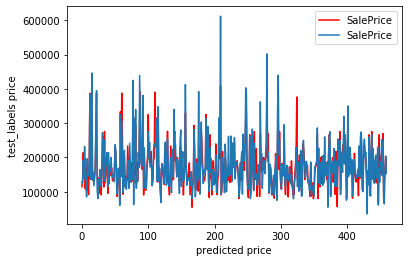

In [54]:
mpl.plot(result,'r-',test_label[1].to_numpy(),label='SalePrice')
mpl.ylabel('test_labels price')
mpl.xlabel('predicted price')
mpl.legend()